# Dataset Creation

In this notebook we create a dataset for our application by combining data from various datasets available on Kaggle. For more reference as to the datasets used, refer to the README.md in the project root directory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
both_1=pd.read_csv('../data/sources/fake_or_real_news.csv')
real_3=pd.read_csv("../data/sources/News Classification test.csv")
fake_1=pd.read_csv("../data/sources/fake.csv")
fake_2=pd.read_csv("../data/sources/Fake (2).csv")
both_2=pd.read_csv("../data/sources/news_articles.csv")
real_2=pd.read_csv("../data/sources/True.csv")

In [3]:
print(both_1.shape,fake_1.shape,fake_2.shape,both_2.shape)

(6335, 4) (12999, 20) (23481, 4) (2096, 12)


## Formatting Data

We need to define a structure for our final dataset. For obvious reasons, we cannot use the author's name and other such columns as features as we want our model to only predict on the headline and the content of the news article itself. Hence, the final format of the dataset should be:


| title 	| text 	| label 	|
|-------	|------	|-------	|
|Hillary...	| Hillary...| FAKE 	|
|Hillary...	| Hillary...| REAL	|
|Hillary...	| Hillary...| FAKE 	|
|Hillary...	| Hillary...| REAL 	|

In [4]:
both_1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
both_1

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
fake_1[['title','text','language']]

,title,text,language
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english
...,...,...,...
12994,NaN,It DOES allow you to put a dog face on top of ...,english
12995,NaN,Wait till you see what happens to the valuatio...,english
12996,NaN,I'm waiting for the one that puts a pussy on m...,english
12997,NaN,$4 Billion even after they are known to be kee...,english


In [7]:
fake_1['language'].value_counts()

english       12403
russian         203
spanish         172
german          111
french           38
arabic           22
portuguese       11
turkish          10
italian           9
ignore            7
greek             4
norwegian         3
dutch             3
polish            1
chinese           1
finnish           1
Name: language, dtype: int64

In [8]:
fake_1=fake_1[['title','text','language']]

In [9]:
fake_1=fake_1[fake_1['language']=='english']

In [10]:
fake_1.drop('language',axis=1,inplace=True)
fake_1['label']='FAKE'

In [11]:
fake_1

,title,text,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,FAKE
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,FAKE
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE
...,...,...,...
12994,NaN,It DOES allow you to put a dog face on top of ...,FAKE
12995,NaN,Wait till you see what happens to the valuatio...,FAKE
12996,NaN,I'm waiting for the one that puts a pussy on m...,FAKE
12997,NaN,$4 Billion even after they are known to be kee...,FAKE


In [12]:
df=pd.concat([both_1,fake_1])

In [13]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
12994,NaN,It DOES allow you to put a dog face on top of ...,FAKE
12995,NaN,Wait till you see what happens to the valuatio...,FAKE
12996,NaN,I'm waiting for the one that puts a pussy on m...,FAKE
12997,NaN,$4 Billion even after they are known to be kee...,FAKE


C:\Users\Ashwin\miniconda3\envs\TARP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

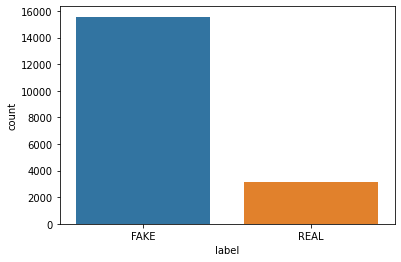

In [14]:
sns.countplot(df['label'])

In [15]:
both_2=both_2[['title','text','language','label']]

In [16]:
both_2=both_2[both_2['language']=='english']

In [17]:
both_2.drop('language',axis=1,inplace=True)

In [18]:
df=pd.concat([df,both_2])

In [19]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
2090,prof canoes reek of genocide white privilege,NaN,Real
2091,teens walk free after gangrape conviction,NaN,Real
2092,school named for munichmassacre mastermind,NaN,Real
2093,russia unveils satan missile,NaN,Fake


In [20]:
real_2['label']='REAL'

In [21]:
real_2.drop(['date','subject'],axis=1,inplace=True)

In [22]:
df=pd.concat([df,real_2])

In [23]:
fake_2.drop(['subject','date'],axis=1,inplace=True)

In [24]:
fake_2['label']='FAKE'

In [25]:
df=pd.concat([df,fake_2])

In [26]:
df.shape

(65653, 3)

In [27]:
real_3['label']='REAL'

In [28]:
real_3.drop('Class Index',axis=1,inplace=True)

In [29]:
real_3.columns

Index(['Title', 'Description', 'label'], dtype='object')

In [30]:
real_3.rename({'Title':'title','Description':'text'},axis=1,inplace=True)

In [31]:
real_3

,title,text,label
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,REAL
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",REAL
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,REAL
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,REAL
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,REAL
...,...,...,...
7595,Around the world,Ukrainian presidential candidate Viktor Yushch...,REAL
7596,Void is filled with Clement,With the supply of attractive pitching options...,REAL
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,REAL
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,REAL


In [32]:
df=pd.concat([df,real_3])

In [33]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
7595,Around the world,Ukrainian presidential candidate Viktor Yushch...,REAL
7596,Void is filled with Clement,With the supply of attractive pitching options...,REAL
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,REAL
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,REAL


## Final Cleaning and Inspecting of Data

In this section, we inspect the data for usability and quality by:

1. Removing any duplicate rows
2. Rebalancing the created dataset(if required)

In [34]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
7595,Around the world,Ukrainian presidential candidate Viktor Yushch...,REAL
7596,Void is filled with Clement,With the supply of attractive pitching options...,REAL
7597,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,REAL
7598,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,REAL


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73253 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   72573 non-null  object
 1   text    73162 non-null  object
 2   label   73253 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [36]:
def print_float(x):
    if(type(x))==float:
        print(x)
    return x

In [37]:
df.isnull().sum()

title    680
text      91
label      0
dtype: int64

In [38]:
df=df[df['text'].isnull()==False]
df=df[df['title'].isnull()==False]

In [39]:
df.shape

(72482, 3)

In [40]:
df['lower_title']=df['title'].apply(lambda x:print_float(x))
df['lower_text']=df['text'].apply(lambda x:x.lower())
df['label']=df['label'].apply(lambda x:x.upper())

In [41]:
df.drop_duplicates(subset=['lower_title'],inplace=True)
df.drop_duplicates(subset=['lower_text'],inplace=True)


In [42]:
df.shape

(61144, 5)

C:\Users\Ashwin\miniconda3\envs\TARP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


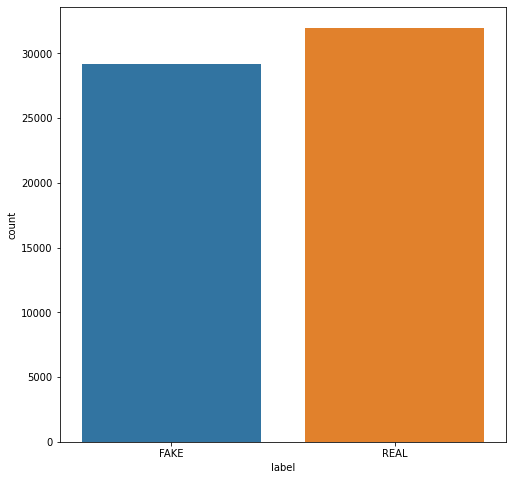

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(df['label'])
plt.savefig('../output/Data_Balance.png')

In [44]:
df.isnull().sum()

title          0
text           0
label          0
lower_title    0
lower_text     0
dtype: int64

We seem to have a few null values, but not a lot and these can be simply dropped when we do Data Cleaning. Thus we have an approximately balanced dataset, with sufficient samples of each type of news (~30000).

In [45]:
df[['title','text','label']].to_csv('../data/TARP_Project_Final_Dataset.csv',index=False)